In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import openpyxl 
import os

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.metrics import r2_score
from scipy import stats
import csv
import statsmodels.api as sm

In [3]:
from load_data import load_processed_general_data
from load_data import load_processed_society_data
from load_data import load_processed_quality_of_life_data

In [12]:
def replace_placeholder(table):
    n = len(table.columns)
    for i in range(0,n):
        index = table.columns[i]
        the_median = table[index].median()
        table[index] = table[index].replace(-1, the_median)
    return table

In [4]:
def MinMaxNormal(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true=np.array(y_true)
    y_pred=np.array(y_pred)
    MSPE = (sum((MinMaxNormal(y_pred)-MinMaxNormal(y_true))**2)/(y_pred.size))/(MinMaxNormal(y_true).mean())
    MSPE = MSPE*100
    return np.abs(MSPE)

In [7]:
def R2test(test_set,value_set):
    results = []
    for i in  range(len(value_set[0,:])):
        R2 = r2_score(test_set,value_set[:,i])
        results.append(R2)
    return results

In [8]:
def produce_predictions_linear_regression(train_X, test_X, train_y, test_y):
    # data fitting
    model = LinearRegression().fit(train_X, train_y)
    # make predictions
    predictions = model.predict(test_X)
    return predictions,model

In [9]:
median_houses_2020,lower_quatile_houses_2020,A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,local_authority_names = load_processed_general_data()
worksheet,lower_quatile_earning_2020,ratio_by_lower_quatile_2020,median_earning_2020,ratio_by_medians_2020,month_rent_higher_quatile,month_rent_lower_quatile,total_threaten_homeless,violence_crime_ratio,sexual_crime_ratio,robbery_crime_ratio,theft_crime_ratio,damage_arson_crime_ratio,drug_crime_ratio,other_crime_ratio,employment_data,male_life_expectency,female_life_expectency,total_households_2020,households_with_children_ratio,one_female_households_ratio,one_male_households_ratio,pop_under_10_ratio,pop_teenager_ratio,pop_20_39_ratio,pop_40_60_ratio,pop_60_80_ratio,pop_80_90_ratio,total_population_2020,size_of_la_area = load_processed_society_data()
taxi_only_licensed_drivers,total_drivers,education_sector_size,health_sector_size,art_and_entertainment_sector_size,retail_sector_size = load_processed_quality_of_life_data()

In [10]:
worksheet.describe()

,Violence against the person ratio,Sexual offences ratio,Robbery ratio,Theft offences ratio,Criminal damage and arson ratio,Drug offences ratio,Other Crime Ratio,Total Employee All (thousands),Male life expectancy at birth (2012/2020)4,Female life expectancy at birth (2020)4,...,C_D_property_counts,E_F_property_counts,G_H_property_counts,Taxi_only_licensed_drivers,Total_licensed_vehicles,total_drivers,Retail,Education,Health,"Arts, entertainment, recreation & other services"
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.337481,0.004187,-0.018529,0.276075,0.085445,0.009234,0.097227,62.518444,79.007781,82.623631,...,26065.567723,10218.363112,2803.377522,71.181556,475.458213,546.786744,543.149856,116.074928,255.512968,426.161383
std,0.236925,0.173706,0.169622,0.244748,0.192969,0.174981,0.200614,74.597581,7.641409,7.934440,...,20047.623037,9098.640076,4178.593874,206.890169,805.241051,924.116551,588.027722,101.746257,240.230746,421.717240
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.343681,0.027617,0.004478,0.256080,0.100418,0.026666,0.100826,24.050000,78.500000,82.400000,...,13770.000000,4185.000000,480.000000,0.000000,127.500000,147.500000,250.000000,55.000000,125.000000,215.000000
50%,0.382533,0.032577,0.006952,0.291099,0.114448,0.034217,0.120590,47.200000,79.800000,83.400000,...,22650.000000,7670.000000,1380.000000,0.000000,260.000000,289.000000,370.000000,95.000000,195.000000,315.000000
75%,0.416657,0.037471,0.011302,0.348055,0.127899,0.045336,0.142430,82.400000,80.900000,84.300000,...,32130.000000,13670.000000,3660.000000,56.500000,521.500000,597.000000,645.000000,150.000000,327.500000,505.000000
max,0.490262,0.134678,0.064232,1.046934,0.490466,0.124212,0.692536,704.100000,83.300000,86.700000,...,122490.000000,52600.000000,39980.000000,2295.000000,9755.000000,9849.000000,4500.000000,760.000000,2290.000000,4415.000000


In [13]:
quality_of_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Education'],worksheet['Arts, entertainment, recreation & other services'],worksheet['Year 2020: One person households: Female ratio'],worksheet['Year 2020: One person households: Male ratio'],worksheet['Year 2020: Households with dependent children ratio'],worksheet['pop_ratio_under_10'],worksheet['pop_ratio_teenager'],worksheet['pop_ratio_20_39'],worksheet['pop_ratio_40_60'],worksheet['pop_ratio_60_80'],worksheet['pop_ratio_80_90+']])
quality_of_life_dataframe = quality_of_life_dataframe.transpose()
quality_of_life_dataframe = replace_placeholder(quality_of_life_dataframe)

In [14]:
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers/total_households_2020
taxi_only_licensed_drivers_ratio = taxi_only_licensed_drivers_ratio.astype('float')
taxi_only_licensed_drivers_ratio = pd.DataFrame(taxi_only_licensed_drivers_ratio)
taxi_only_licensed_drivers_ratio.columns=['taxi_only_licensed_drivers_ratio_to_households']

total_drivers_ratio = total_drivers/total_households_2020
total_drivers_ratio = total_drivers_ratio.astype('float')
total_drivers_ratio = pd.DataFrame(total_drivers_ratio)
total_drivers_ratio.columns=['total_drivers_ratio_to_households']

health_sector_size_ratio = health_sector_size/total_households_2020
health_sector_size_ratio = health_sector_size_ratio.astype('float')
health_sector_size_ratio = pd.DataFrame(health_sector_size_ratio)
health_sector_size_ratio.columns=['health_sector_size_ratio_to_households']

retail_sector_size_ratio = retail_sector_size/total_households_2020
retail_sector_size_ratio = retail_sector_size_ratio.astype('float')
retail_sector_size_ratio = pd.DataFrame(retail_sector_size_ratio)
retail_sector_size_ratio.columns=['retail_sector_size_ratio_to_households']

In [15]:
pd.DataFrame([retail_sector_size_ratio['retail_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households']])

,0,1,2,3,4,5,6,7,8,9,...,337,338,339,340,341,342,343,344,345,346
retail_sector_size_ratio_to_households,0.006205,0.008492,0.005744,0.007637,0.009737,0.006174,0.006343,0.007745,0.005315,0.009105,...,0.004959,0.004411,0.006452,0.005264,0.007123,0.00655,0.007119,0.008342,0.006359,0.006484
retail_sector_size_ratio_to_households,0.006205,0.008492,0.005744,0.007637,0.009737,0.006174,0.006343,0.007745,0.005315,0.009105,...,0.004959,0.004411,0.006452,0.005264,0.007123,0.00655,0.007119,0.008342,0.006359,0.006484


In [16]:
daily_life_dataframe = pd.DataFrame([worksheet['median_houses_2020'],health_sector_size_ratio['health_sector_size_ratio_to_households'],retail_sector_size_ratio['retail_sector_size_ratio_to_households'],taxi_only_licensed_drivers_ratio['taxi_only_licensed_drivers_ratio_to_households'],total_drivers_ratio['total_drivers_ratio_to_households'],A_B_property_counts,C_D_property_counts,E_F_property_counts,G_H_property_counts,male_life_expectency,female_life_expectency])
daily_life_dataframe = daily_life_dataframe.transpose()
daily_life_dataframe = replace_placeholder(daily_life_dataframe)

In [17]:
social_space_dataframe = pd.DataFrame([worksheet['median_houses_2020'],worksheet['Robbery ratio'],worksheet['Theft offences ratio'],worksheet['Criminal damage and arson ratio'],worksheet['Drug offences ratio'],worksheet['Total Employee All (thousands)'],worksheet['Total_Threaten_or_is_Homeless']])
social_space_dataframe = social_space_dataframe.transpose()
social_space_dataframe = replace_placeholder(social_space_dataframe)

In [18]:
personal_space = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns != 'median_houses_2020'].astype('float')
personal_class = quality_of_life_dataframe.iloc[:, quality_of_life_dataframe.columns == 'median_houses_2020'].astype('int')

daily_space = daily_life_dataframe.iloc[:, daily_life_dataframe.columns != 'median_houses_2020'].astype('float')
daily_class = daily_life_dataframe.iloc[:, daily_life_dataframe.columns == 'median_houses_2020'].astype('int')

social_space = social_space_dataframe.iloc[:, social_space_dataframe.columns != 'median_houses_2020'].astype('float')
social_class = social_space_dataframe.iloc[:, social_space_dataframe.columns == 'median_houses_2020'].astype('int')

In [19]:
################
pl_training_set, pl_test_set, pl_class_set, test_pl_class_set = train_test_split(personal_space,
                                                                    personal_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

################
dl_training_set, dl_test_set, dl_class_set, test_dl_class_set = train_test_split(daily_space,
                                                                    daily_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

################
sl_training_set, sl_test_set, sl_class_set, test_sl_class_set = train_test_split(social_space,
                                                                    social_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 0)

In [20]:
train_X, test_X, train_y, test_y = train_test_split(quality_of_life_dataframe, median_houses_2020, test_size=0.2, random_state=0,)

In [67]:
# normalization
pl_training_set_norm = MinMaxNormal(pl_training_set)
pl_test_set_norm = MinMaxNormal(pl_test_set)
pl_class_set_norm = MinMaxNormal(pl_class_set)
test_pl_class_set_norm = MinMaxNormal(test_pl_class_set)

dl_training_set_norm = MinMaxNormal(dl_training_set)
dl_test_set_norm = MinMaxNormal(dl_test_set)
dl_class_set_norm = MinMaxNormal(dl_class_set)
test_dl_class_set_norm = MinMaxNormal(test_dl_class_set)

sl_training_set_norm = MinMaxNormal(sl_training_set)
sl_test_set_norm = MinMaxNormal(sl_test_set)
sl_class_set_norm = MinMaxNormal(sl_class_set)
test_sl_class_set_norm = MinMaxNormal(test_sl_class_set)

In [75]:
# predictions and model
pl_predictions,pl_model = produce_predictions_linear_regression(pl_training_set_norm, pl_test_set_norm, pl_class_set_norm, test_pl_class_set_norm)
dl_predictions,dl_model = produce_predictions_linear_regression(dl_training_set_norm, dl_test_set_norm, dl_class_set_norm, test_dl_class_set_norm)
sl_predictions,sl_model = produce_predictions_linear_regression(sl_training_set_norm, sl_test_set_norm, sl_class_set_norm, test_sl_class_set_norm)

In [146]:
def denormal(normalized_df,original_df):
    index_record = original_df.index
    normalized_df = np.array(normalized_df)
    original_df = np.array(original_df)
    min_max_dff = (original_df.max()-original_df.min())
    column = normalized_df
    df = normalized_df*min_max_dff
    df+=original_df.min()
    df = pd.DataFrame(df)
    df.columns = ['median_house_prices_2020']
    df.index = index_record
    return df

In [147]:
# Return the normalized values to real values
pl_full_predictions = denormal(pd.DataFrame(pl_predictions),pd.DataFrame(test_pl_class_set))


In [148]:
pl_full_predictions

,median_house_prices_2020
6,194161.293711
313,175492.224355
284,193580.981274
122,199781.894119
92,184386.764105
...,...
310,141634.573256
103,376953.336966
255,164192.647448
63,312750.868811


In [149]:
dl_full_predictions = denormal(pd.DataFrame(dl_predictions),pd.DataFrame(test_dl_class_set_norm))
sl_full_predictions = denormal(pd.DataFrame(sl_predictions),pd.DataFrame(test_sl_class_set_norm))

In [150]:
pl_scores = pd.DataFrame(pl_model.coef_)
pl_scores=pl_scores.transpose()
dl_scores = pd.DataFrame(dl_model.coef_)
dl_scores=dl_scores.transpose()
sl_scores = pd.DataFrame(sl_model.coef_)
sl_scores=sl_scores.transpose()

In [151]:
pl_scores.columns = ['Scores']
pl_scores.index = pl_training_set_norm.columns

dl_scores.columns = ['Scores']
dl_scores.index = dl_training_set_norm.columns

sl_scores.columns = ['Scores']
sl_scores.index = sl_training_set_norm.columns

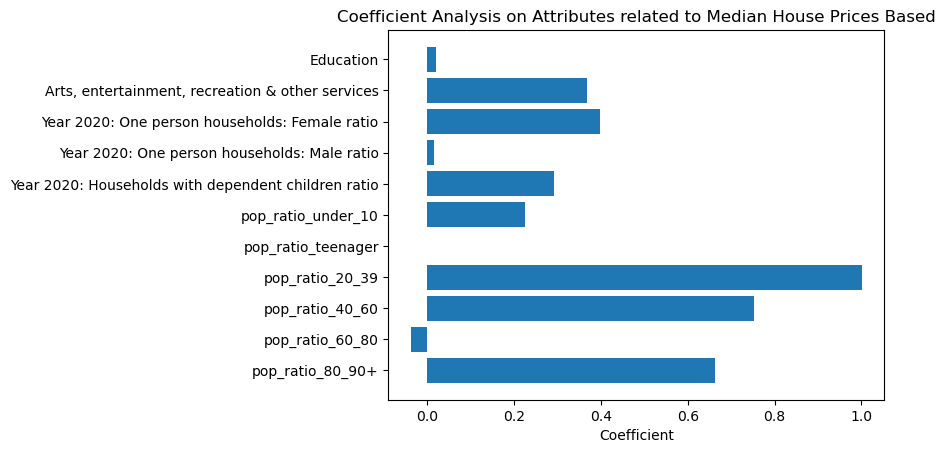

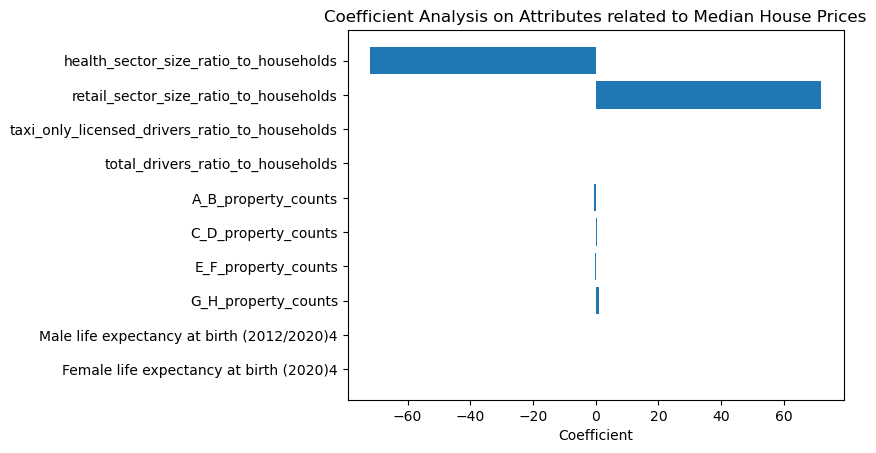

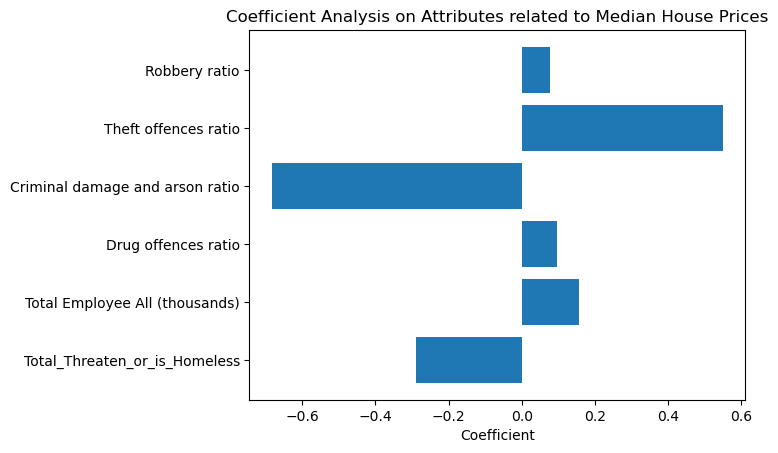

In [152]:
# Fixing random state for reproducibility
np.random.seed(0)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
xpl_names = list(pl_scores.index[:])
ypl_pos = np.arange(len(xpl_names))

ax.barh(ypl_pos, pl_scores['Scores'].values, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ypl_pos)
ax.set_yticklabels(list(xpl_names))
ax.set_xlabel('Coefficient')
ax.set_title('Coefficient Analysis on Attributes related to Median House Prices Based')
plt.savefig('Figure/mlr_pl_Coefficient_analysis.png')
plt.show()

# Fixing random state for reproducibility
np.random.seed(0)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
xdl_names = list(dl_scores.index[:])
ydl_pos = np.arange(len(xdl_names))

ax.barh(ydl_pos, dl_scores['Scores'].values, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ydl_pos)
ax.set_yticklabels(list(xdl_names))
ax.set_xlabel('Coefficient')
ax.set_title('Coefficient Analysis on Attributes related to Median House Prices')
plt.savefig('Figure/mlr_dl_Coefficient_analysis.png')
plt.show()

# Fixing random state for reproducibility
np.random.seed(0)
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
xsl_names = list(sl_scores.index[:])
ysl_pos = np.arange(len(xsl_names))

ax.barh(ysl_pos, sl_scores['Scores'].values, align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_yticks(ysl_pos)
ax.set_yticklabels(list(xsl_names))
ax.set_xlabel('Coefficient')
ax.set_title('Coefficient Analysis on Attributes related to Median House Prices')
plt.savefig('Figure/mlr_sl_Coefficient_analysis.png')
plt.show()

In [153]:
cwd = os.getcwd()
pl_scores.to_csv(os.path.join(cwd, "ResultTables/mlr_personal_life_scores.csv"))  
cwd = os.getcwd()
dl_scores.to_csv(os.path.join(cwd, "ResultTables/mlr_daily_life_scores.csv"))  
cwd = os.getcwd()
sl_scores.to_csv(os.path.join(cwd, "ResultTables/mlr_social_life_scores.csv"))  

In [154]:
pl_full_predictions

,median_house_prices_2020
6,194161.293711
313,175492.224355
284,193580.981274
122,199781.894119
92,184386.764105
...,...
310,141634.573256
103,376953.336966
255,164192.647448
63,312750.868811


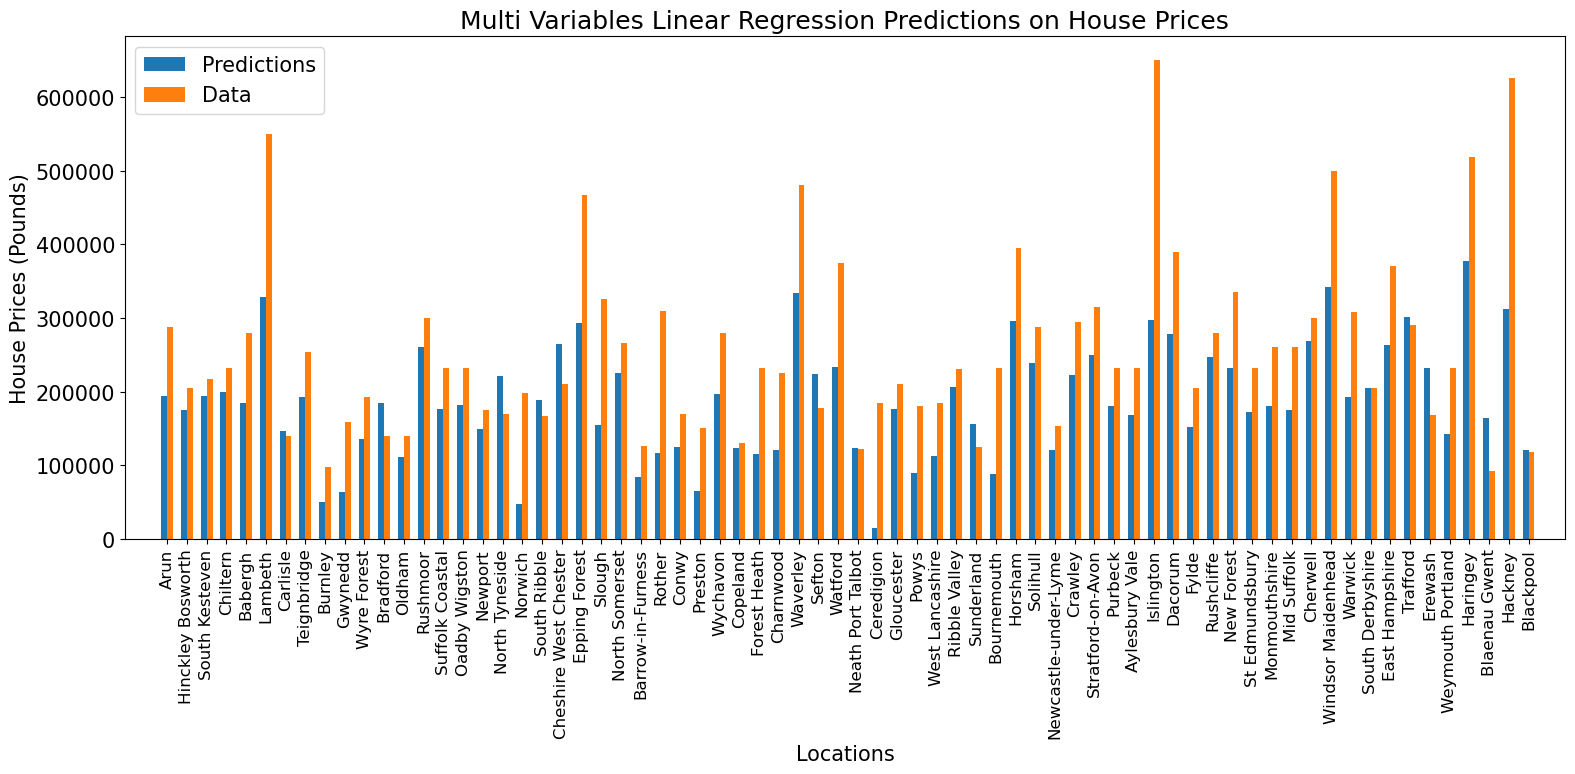

In [180]:
f_predictions = list(pl_full_predictions[pl_full_predictions.columns[0]])
test_y = list(test_pl_class_set[test_pl_class_set.columns[0]])
N =len(f_predictions)
locations = range(1,N+1)

# Position of bars on x-axis
y_pos = np.arange(N)

# Width of a bar 
width = 0.3
# Plotting
plt.rcParams.update({'font.size': 15})
fig_r2, ax = plt.subplots(figsize=(16,8))
plt.bar(y_pos, f_predictions , width, label='Predictions')
plt.bar(y_pos + width, test_y, width, label='Data')
plt.xlabel('Locations')
plt.ylabel('House Prices (Pounds)')
plt.title('Multi Variables Linear Regression Predictions on House Prices')

# xticks()
plt.xticks(y_pos + width / 2, list(local_authority_names[test_pl_class_set.index]))
plt.setp(ax.get_xticklabels(), fontsize=12, rotation='vertical')
# Size of the Plot
plt.xlim([-2,max(y_pos)+2])
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Figure/mlr_pl_full_prediction_plots.png')
plt.show()

0.05774500873654643